In [88]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc,recall_score,precision_score,auc
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc,recall_score,precision_score,auc,precision_recall_curve, average_precision_score
import eli5 
from sklearn.feature_selection import SelectFromModel
from eli5.sklearn import PermutationImportance
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
import lightgbm as lgb

In [13]:
os.getcwd()

'C:\\Users\\HP'

In [14]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [15]:
#let check the the description of train data set
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None


In [136]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB
None


In [16]:
#let see the data set
train.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [17]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [18]:
#let check first check is their missing any missing value
train.isnull().any().value_counts()
#as Count equal to no of column So there are no missing value  

False    202
dtype: int64

distribution of first 25 variable


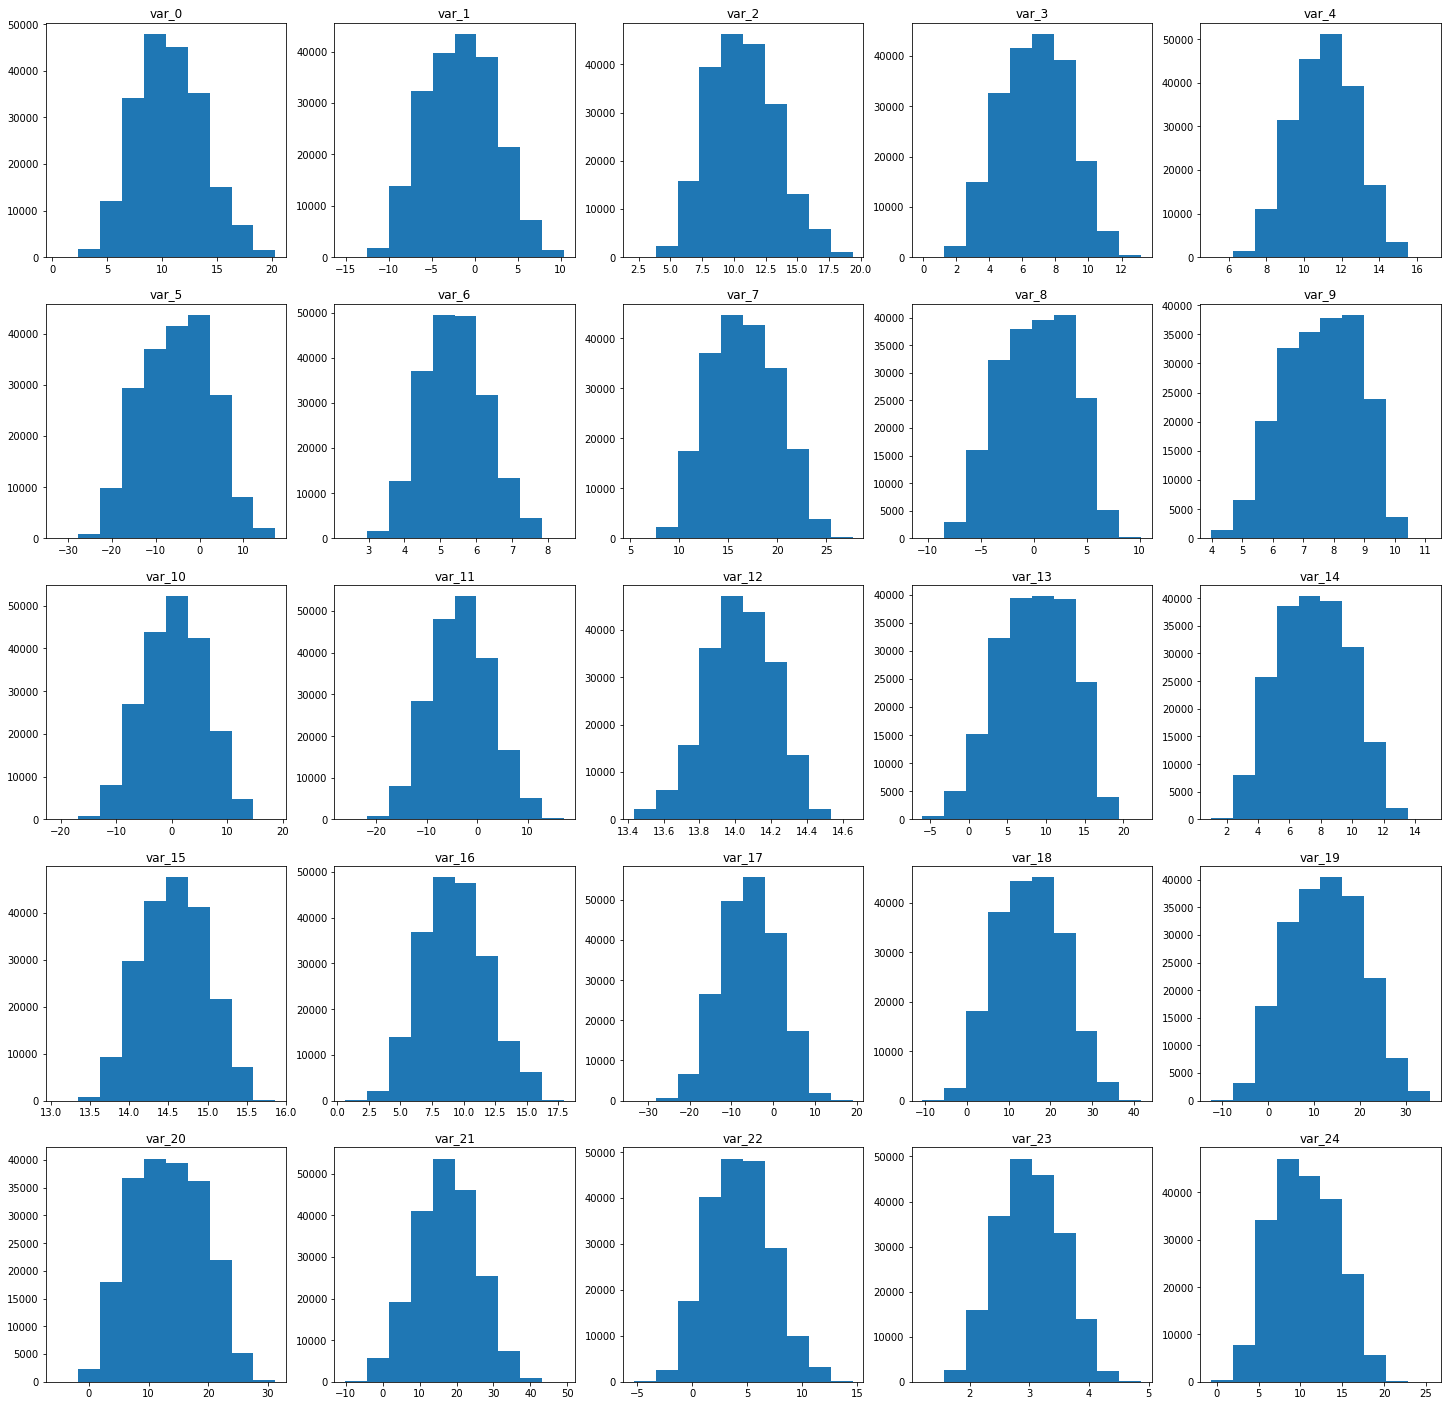

In [19]:
#let check th distribution of first 25 variable
print('distribution of first 25 variable');
plt.figure(figsize=(25,25))
for i,col in enumerate(list(train.columns)[2:27]):
    plt.subplot(5,5,i+1)
    plt.hist(train[col])
    plt.title(col)

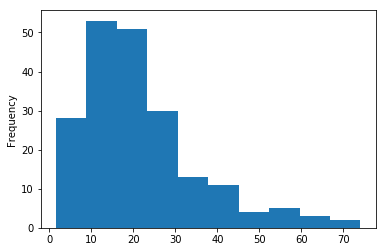

In [20]:
#looks like most the variable kind of normal distributed let check mean,std,max,min,meadain distribution to get more idea
train[train.columns[2:]].max().plot('hist');


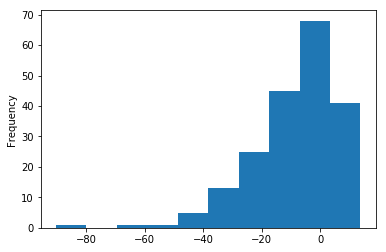

In [21]:
train[train.columns[2:]].min().plot('hist');

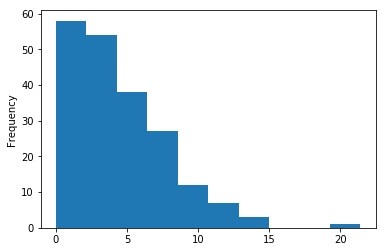

In [22]:
train[train.columns[2:]].std().plot('hist');


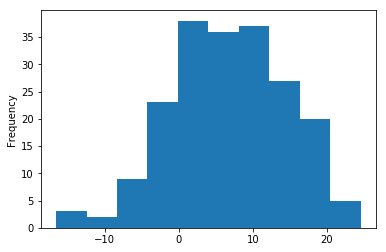

In [23]:
train[train.columns[2:]].mean().plot('hist');


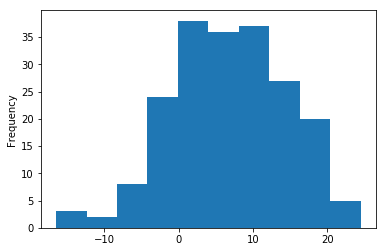

In [24]:
train[train.columns[2:]].median().plot('hist');

In [25]:
#Generate correlation matrix
corr=train[train.columns[2:]].corr().abs()

In [26]:
corr

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,0.000544,0.006573,0.003801,0.001326,0.003046,6.982549e-03,0.002429,0.004962,0.002613,...,0.002752,0.000206,0.005373,0.001616,0.001514,0.002073,0.004386,0.000753,0.005776,0.003850
var_1,0.000544,1.000000,0.003980,0.000010,0.000303,0.000902,3.257729e-03,0.001511,0.004098,0.000832,...,0.006627,0.003621,0.002604,0.001153,0.002557,0.000785,0.000377,0.004157,0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,8.825211e-04,0.000991,0.002648,0.001932,...,0.000197,0.001285,0.003400,0.000549,0.002104,0.001070,0.003952,0.001078,0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,0.000322,0.003253,7.743892e-04,0.002500,0.003553,0.000826,...,0.000151,0.002445,0.001530,0.001699,0.001054,0.001206,0.002800,0.001164,0.001651,0.000506
var_4,0.001326,0.000303,0.000723,0.000322,1.000000,0.001368,4.882529e-05,0.004549,0.001194,0.000918,...,0.001514,0.004357,0.003347,0.000813,0.000068,0.003706,0.000513,0.000046,0.001821,0.000786
var_5,0.003046,0.000902,0.001569,0.003253,0.001368,1.000000,2.587780e-03,0.000995,0.000147,0.005279,...,0.001466,0.000022,0.001116,0.002237,0.002543,0.001274,0.002880,0.000535,0.000953,0.002767
var_6,0.006983,0.003258,0.000883,0.000774,0.000049,0.002588,1.000000e+00,0.002548,0.001188,0.005697,...,0.000721,0.005604,0.002563,0.002464,0.001141,0.001244,0.005378,0.003565,0.003025,0.006096
var_7,0.002429,0.001511,0.000991,0.002500,0.004549,0.000995,2.547746e-03,1.000000,0.000814,0.002885,...,0.000337,0.003957,0.001733,0.003219,0.000270,0.001854,0.001045,0.003466,0.000650,0.001457
var_8,0.004962,0.004098,0.002648,0.003553,0.001194,0.000147,1.187995e-03,0.000814,1.000000,0.001073,...,0.002923,0.001151,0.000429,0.001414,0.001313,0.001396,0.003242,0.004583,0.002950,0.000854
var_9,0.002613,0.000832,0.001932,0.000826,0.000918,0.005279,5.696919e-03,0.002885,0.001073,1.000000,...,0.000871,0.002371,0.000014,0.001407,0.003099,0.000868,0.000052,0.003701,0.002343,0.001070


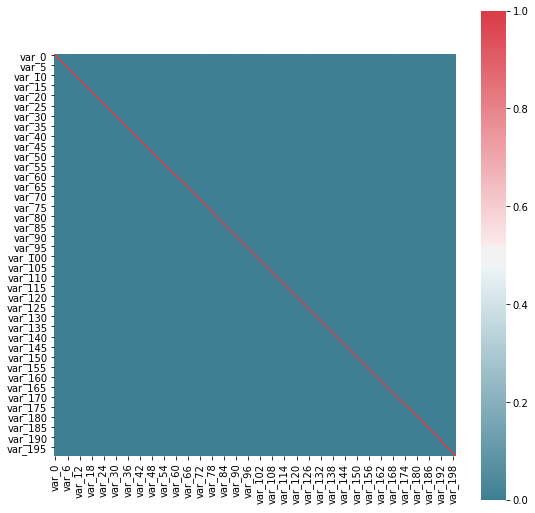

In [27]:
#now check colinear anlaysis between all integer variable
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(9, 9))

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

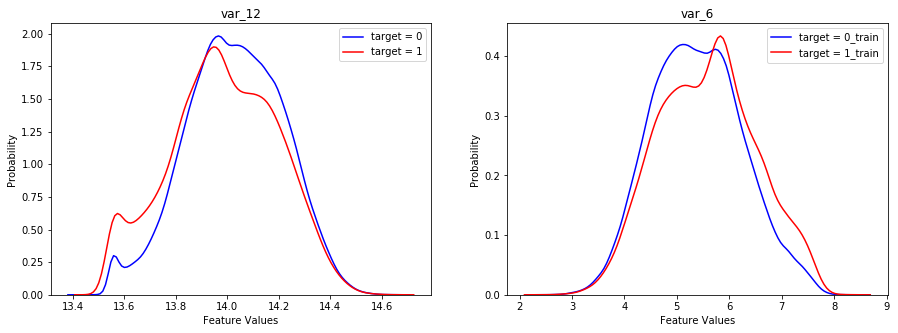

In [137]:
feat1, feat2 = 'var_12', 'var_6'

fig = plt.subplots(figsize=(15, 5))

#plot pdf feature 1
plt.subplot(1, 2, 1)
sns.kdeplot(train[feat1][train['target'] == 0], color="b", label = 'target = 0')
sns.kdeplot(train[feat1][train['target'] == 1], color="r", label = 'target = 1')
plt.title(feat1)
plt.xlabel('Feature Values')
plt.ylabel('Probability')

#plot pdf feat 2
plt.subplot(1,2, 2)
sns.kdeplot(train[feat2][train['target'] == 0], color="b", label = 'target = 0_train')
sns.kdeplot(train[feat2][train['target'] == 1], color="r", label = 'target = 1_train')

plt.title(feat2)
plt.xlabel('Feature Values')
plt.ylabel('Probability')

plt.show()

In [29]:
#interesting feature that we got from EDA

#there is no corelation between any of the variable


#As we can see that their is no collinearity and their is no need for outlinear anlysis(as it is anonymized dataset) now As i am planning to use decision tree,naivebayes and random forest for now So there o need of feature scaling

In [112]:
X = train.drop(['ID_code', 'target'], axis=1)
Y = train['target']
train_X, val_X, train_y, val_y = train_test_split(X, Y,test_size=.2,stratify=Y)

In [46]:
def output_score(Y,Predictions):
    print("area under curve in ROC: {:<8.5f}".format(roc_auc_score(Y, Predictions))) 
    print("accuracy_score: {:<8.5f}".format(accuracy_score(Y,Predictions))) 
    print("recall_score: {:<8.5f}".format(recall_score(Y,Predictions))) 
    print("precision_score : {:<8.5f}".format(precision_score(Y, Predictions))) 


In [31]:
rfc_model = RandomForestClassifier(n_estimators=10).fit(train_X, train_y)

In [32]:
val_y.value_counts()

0    35980
1     4020
Name: target, dtype: int64

In [33]:
RF_Predictions = rfc_model.predict(val_X)
x=pd.DataFrame(RF_Predictions) 
x[0].value_counts()

0    39878
1      122
Name: 0, dtype: int64

In [34]:
CM = pd.crosstab(val_y, RF_Predictions)
CM

col_0,0,1
target,,
0,35934,46
1,3944,76


In [49]:
output_score(val_y, RF_Predictions)

area under curve in ROC: 0.50881 
accuracy_score: 0.90025 
recall_score: 0.01891 
precision_score : 0.62295 


In [37]:
C50_model = DecisionTreeClassifier(criterion='entropy').fit(train_X,train_y)

In [38]:
predict_Tree=C50_model.predict(val_X)
Triee=pd.DataFrame(predict_Tree)
Triee[0].value_counts()

0    35833
1     4167
Name: 0, dtype: int64

In [39]:
val_y.value_counts()

0    35980
1     4020
Name: target, dtype: int64

In [40]:
CM=pd.crosstab(val_y,predict_Tree)

In [41]:
CM

col_0,0,1
target,,
0,32607,3373
1,3226,794


In [47]:
output_score(val_y,predict_Tree)

area under curve in ROC: 0.55188 
accuracy_score: 0.83503 
recall_score: 0.19751 
precision_score : 0.19054 


In [ ]:
#As we can See that we are getting horrible result So what can we do
#1 As we Can see that we have class inbalance problem first we have to solve that first
#3 for improving the model performance we can apply hyper tuning of parameter(gridsearch)
#4 for this model naive bayes can work very well as features have no correlation and features have guassian like distribution
#4 finally we can try one of boasting algo like xgBoast,catBoast or liight GBM to maximize the result
#6 before doing all of that let's look at imporatant feature in above two model

In [50]:
#i am going to use pre importance to calculate feature inportance

perm=PermutationImportance(C50_model).fit(val_X,val_y)
eli5.show_weights(perm,feature_names=val_X.columns.tolist(),top=150)


Weight,Feature
0.0012 ± 0.0015,var_81
0.0011 ± 0.0012,var_26
0.0009 ± 0.0008,var_110
0.0008 ± 0.0011,var_53
0.0008 ± 0.0007,var_80
0.0008 ± 0.0008,var_165
0.0008 ± 0.0008,var_76
0.0006 ± 0.0012,var_6
0.0006 ± 0.0003,var_71
0.0006 ± 0.0002,var_108


In [51]:
#for the tree based Var_139 is most inportant but our model is not very accurate its does give us a clear picture but still
#let's try taking top 83 variable to predict our model
tranf=SelectFromModel(perm,threshold=0.0001,prefit=True)

In [52]:
X=tranf.transform(train_X)
Y=tranf.transform(val_X)

In [ ]:
X.shape

In [53]:
C50_model = DecisionTreeClassifier(criterion='entropy').fit(X,train_y)

In [54]:
c50_prediction=C50_model.predict(Y)
Triee=pd.DataFrame(c50_prediction)
Triee[0].value_counts()

0    35711
1     4289
Name: 0, dtype: int64

In [55]:
val_y.value_counts()

0    35980
1     4020
Name: target, dtype: int64

In [56]:
CM=pd.crosstab(val_y,c50_prediction)
CM

col_0,0,1
target,,
0,32481,3499
1,3230,790


In [57]:
output_score(val_y,c50_prediction)
#so there is no improvement
#0.55

area under curve in ROC: 0.54963 
accuracy_score: 0.83178 
recall_score: 0.19652 
precision_score : 0.18419 


In [140]:
#we can see that their is not much improvement So let's try to first solve the class inbalance problem by SMOTE   
smt=SMOTE()
new_train_X,new_train_y=smt.fit_sample(train_X,train_y)


In [59]:
def smote_value_update(train_X,train_y):
    smt=SMOTE()
    new_train_X,new_train_y=smt.fit_sample(train_X,train_y)
    return new_train_X,new_train_y


In [60]:
def Decision_tree(train_x,Train_y,val_x,Val_y):
    train_x,Train_y=smote_value_update(train_x,Train_y)
    C50_model = DecisionTreeClassifier(criterion='entropy').fit(train_x,Train_y)
    C50_predict=C50_model.predict(val_x)
    print("will return auc,recall and precision_score")
    return roc_auc_score(val_y,C50_predict),recall_score(val_y,C50_predict),precision_score(val_y,C50_predict)

In [141]:

rfc_model = RandomForestClassifier(n_estimators=15).fit(new_train_X, new_train_y)


In [142]:
rfc_predict=rfc_model.predict(val_X)
rand_predict= pd.DataFrame(rfc_predict)
rand_predict[0].value_counts()

0    37117
1     2883
Name: 0, dtype: int64

In [143]:
val_y.value_counts()

0    35980
1     4020
Name: target, dtype: int64

In [144]:
CM=pd.crosstab(val_y,rfc_predict)
CM

col_0,0,1
target,,
0,33641,2339
1,3476,544


In [145]:
output_score(val_y, RF_Predictions)

area under curve in ROC: 0.49941 
accuracy_score: 0.89685 
recall_score: 0.00199 
precision_score : 0.06557 


In [67]:
perm=PermutationImportance(rfc_model).fit(val_X,val_y)
eli5.show_weights(perm,feature_names=val_X.columns.tolist(),top=150)

Weight,Feature
0.0010 ± 0.0007,var_166
0.0010 ± 0.0007,var_2
0.0009 ± 0.0006,var_22
0.0008 ± 0.0006,var_64
0.0008 ± 0.0004,var_93
0.0008 ± 0.0007,var_91
0.0008 ± 0.0007,var_13
0.0008 ± 0.0013,var_139
0.0007 ± 0.0007,var_53
0.0007 ± 0.0008,var_26


In [68]:
tranf=SelectFromModel(perm,threshold=0.0001,prefit=True)

In [69]:
eli5.show_weights(perm,feature_names=val_X.columns.tolist(),top=80)

Weight,Feature
0.0010 ± 0.0007,var_166
0.0010 ± 0.0007,var_2
0.0009 ± 0.0006,var_22
0.0008 ± 0.0006,var_64
0.0008 ± 0.0004,var_93
0.0008 ± 0.0007,var_91
0.0008 ± 0.0007,var_13
0.0008 ± 0.0013,var_139
0.0007 ± 0.0007,var_53
0.0007 ± 0.0008,var_26


In [76]:
tranf=SelectFromModel(perm,threshold=0.0001,prefit=True)
x=tranf.transform(new_train_X)
y=tranf.transform(val_X)

In [77]:
x.shape

(287844, 91)

In [78]:
rfc_model = RandomForestClassifier(n_estimators=10).fit(x,new_train_y)

In [79]:
rfc_predict=rfc_model.predict(y)
tt=pd.DataFrame(rfc_predict)
tt[0].value_counts()

0    37081
1     2919
Name: 0, dtype: int64

In [80]:
CM=pd.crosstab(val_y,rfc_predict)
CM

col_0,0,1
target,,
0,33511,2469
1,3570,450


In [82]:
output_score(val_y,rfc_predict)

area under curve in ROC: 0.52166 
accuracy_score: 0.84903 
recall_score: 0.11194 
precision_score : 0.15416 


In [ ]:
output_score(val_y, RF_Predictions)

In [83]:
#as we can see that there is some improvement in roc_score but still not enough 
#let try to first reduce the dimension then hypertune the parameter 
#then we will apply StratifiedKFold to get better result 

In [84]:
#from sklearn.model_selection import GridSearchCV
#parameters=[{'n_estimators':[10,20,40,60], 'max_depth':[3,5,7], 'min_samples_split':[2,3,5,7], 'min_samples_leaf':[1,2,4,5,7]}]
#gris_search=GridSearchCV(rfc_model,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
#grid_search=gris_search.fit(new_train_X,new_train_y)
#i have run it for 16 hour and  it's still computing So let's try diffrent method 

In [90]:

import matplotlib as mpl
import matplotlib.pyplot as plt

In [91]:
#overfitting due to no of estimators
n_estimators = [1, 2, 4, 8, 16]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf=rf.fit(new_train_X, new_train_y)
   train_pred = rf.predict(new_train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(new_train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(val_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

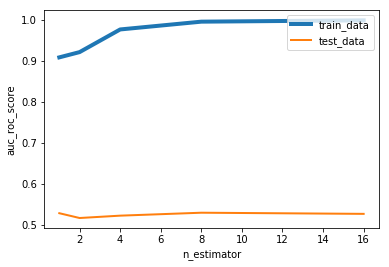

In [92]:
lines = plt.plot(n_estimators, train_results,n_estimators,test_results)
plt.setp(lines[0], linewidth=4)
plt.setp(lines[1], linewidth=2)
plt.legend(('train_data','test_data'),loc='upper right')
plt.xlabel("n_estimator")
plt.ylabel("auc_roc_score")
plt.show()

In [93]:
#overfitting due to depth of tree 
max_depths = np.linspace(1, 16, 16, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(n_estimators=10,max_depth=max_depth, n_jobs=-1)
   rf.fit(new_train_X, new_train_y)
   train_pred = rf.predict(new_train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(new_train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(val_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

In [94]:
test_results,max_depth

([0.5406941805701896,
  0.5587335695065528,
  0.5620355006512738,
  0.5588952817900492,
  0.5658518137494849,
  0.5666547059035009,
  0.5677921537393632,
  0.5684248988520433,
  0.572420070298867,
  0.578702651279456,
  0.5802437230191455,
  0.5740365017602371,
  0.582690770715627,
  0.5800808354005405,
  0.5767787659811007,
  0.5762818757795238],
 16.0)

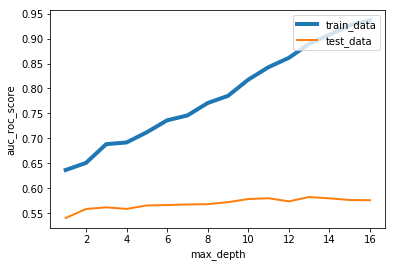

In [95]:

lines = plt.plot(max_depths,train_results,max_depths,test_results)
plt.setp(lines[0], linewidth=4)
plt.setp(lines[1], linewidth=2)
plt.legend(('train_data','test_data'),loc='upper right')
plt.xlabel("max_depth")
plt.ylabel("auc_roc_score")
plt.show()

In [96]:
#how auc score affected due sample required to split the internal node
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(n_estimators=10,max_depth=6,min_samples_split=min_samples_split)
   rf.fit(new_train_X, new_train_y)
   train_pred = rf.predict(new_train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(new_train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(val_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

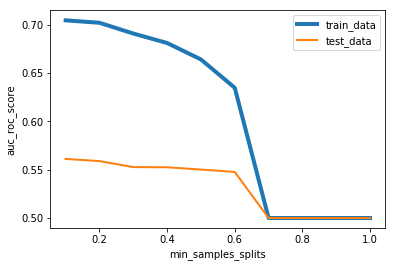

In [97]:
lines = plt.plot(min_samples_splits, train_results,min_samples_splits,test_results)
plt.setp(lines[0], linewidth=4)
plt.setp(lines[1], linewidth=2)
plt.legend(('train_data','test_data'),loc='upper right')
plt.xlabel("min_samples_splits")
plt.ylabel("auc_roc_score")
plt.show()

In [98]:
z = np.linspace(0.1, 0.9, 9, endpoint=True)

In [99]:
#overfitting due minimum number of samples required to be at a leaf node
min_samples_leafs = np.linspace(0.2, 0.3,5, endpoint=True)

train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(n_estimators=10,max_depth=6,min_samples_split=0.1,min_samples_leaf=min_samples_leaf)
   rf.fit(new_train_X, new_train_y)
   train_pred = rf.predict(new_train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(new_train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(val_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

In [100]:
 train_results,test_results

([0.5959443309570462,
  0.6067001570295021,
  0.5768645516321341,
  0.5841184808437904,
  0.6006934311641028],
 [0.561207788185255,
  0.5731989717891919,
  0.5539161474450981,
  0.5656149491563859,
  0.588352636484061])

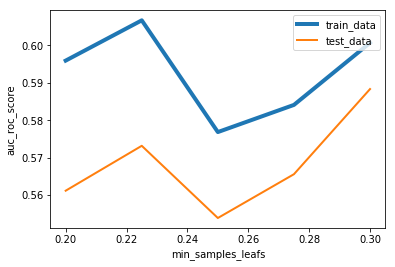

In [101]:
lines = plt.plot(min_samples_leafs, train_results,min_samples_leafs,test_results)
plt.setp(lines[0], linewidth=4)
plt.setp(lines[1], linewidth=2)
plt.legend(('train_data','test_data'),loc='upper right')
plt.xlabel("min_samples_leafs")
plt.ylabel("auc_roc_score")
plt.show()

In [102]:
#max_features represents the number of features to consider when looking for the best spli
max_features = list(range(1,12))  #there are so many feature it will take lot of execution time
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(n_estimators=10,max_depth=6,min_samples_split=0.1,min_samples_leaf=0.28,max_features=max_feature)
   rf.fit(new_train_X, new_train_y)
   train_pred = rf.predict(new_train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(new_train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(val_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)   

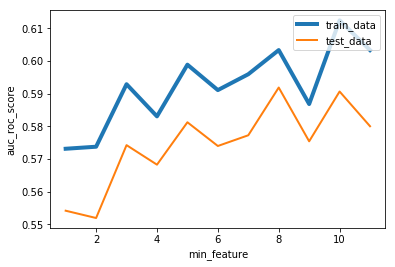

In [103]:
lines = plt.plot(max_features, train_results,max_features,test_results)
plt.setp(lines[0], linewidth=4)
plt.setp(lines[1], linewidth=2)
plt.legend(('train_data','test_data'),loc='upper right')
plt.xlabel("min_feature")
plt.ylabel("auc_roc_score")
plt.show()

In [104]:
train_results

[0.5731159933853059,
 0.5737413321104488,
 0.5928801712038466,
 0.5830345603868763,
 0.5988591042370173,
 0.5910771112130182,
 0.5959373827489891,
 0.6033302761217882,
 0.5868074373619044,
 0.6124359027806728,
 0.603323327913731]

In [105]:
rfc_model=RandomForestClassifier(n_estimators=32,max_depth=7,min_samples_split=0.1,min_samples_leaf=0.28,max_features=7).fit(new_train_X,new_train_y)


In [106]:
rfc_predict=rfc_model.predict(val_X)
rand_predict= pd.DataFrame(rfc_predict)
rand_predict[0].value_counts()

0    24958
1    15042
Name: 0, dtype: int64

In [107]:
CM=pd.crosstab(val_y,rfc_predict)
CM


col_0,0,1
target,,
0,23313,12667
1,1645,2375


In [108]:
output_score(val_y,rfc_predict)

area under curve in ROC: 0.61937 
accuracy_score: 0.64220 
recall_score: 0.59080 
precision_score : 0.15789 


In [109]:
def random_forest_function(X_fit, y_fit, X_val, y_val):
    X_fit, y_fit=smote_value_update(X_fit, y_fit)
    rfc=RandomForestClassifier(n_estimators=32,max_depth=7,min_samples_split=0.1,min_samples_leaf=0.28,max_features=7)
    model=rfc.fit(X_fit,y_fit)
    rfc_predict = model.predict(X_val)
    rand_predict= pd.DataFrame(rfc_predict)
    print(rand_predict[0].value_counts())
    return roc_auc_score(y_val,rfc_predict)

In [110]:
StratifiedKFold

sklearn.model_selection._split.StratifiedKFold

In [113]:
 # as we can see that hypertuning is not even working So we will apply KfoldCrossvalidation in
#decision tree then we move on to diffrent model
y_df = np.array(Y)                        
df_ids=np.array(X.index)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf.get_n_splits(df_ids, y_df)
t=0
 for counter, ids in enumerate(skf.split(df_ids, y_df)):
        print('\nFold {}'.format(counter+1))
        X_fit, y_fit = X.values[ids[0]], y_df[ids[0]]
        X_val, y_val = X.values[ids[1]], y_df[ids[1]]
        auc_ro=random_forest_function(X_fit, y_fit, X_val, y_val)
        t=t+auc_ro
        print(auc_ro)
t/10


Fold 1
0    12181
1     7820
Name: 0, dtype: int64
0.6120376523253335

Fold 2
0    12207
1     7794
Name: 0, dtype: int64
0.605016894848751

Fold 3
0    12212
1     7788
Name: 0, dtype: int64
0.6181712338806247

Fold 4
0    12242
1     7758
Name: 0, dtype: int64
0.595221778821291

Fold 5
0    12188
1     7812
Name: 0, dtype: int64
0.5970395382730593

Fold 6
0    12050
1     7950
Name: 0, dtype: int64
0.6086908426184807

Fold 7
0    12393
1     7607
Name: 0, dtype: int64
0.6052260929925137

Fold 8
0    12340
1     7660
Name: 0, dtype: int64
0.6228349635922665

Fold 9
0    12129
1     7870
Name: 0, dtype: int64
0.5914180932883735

Fold 10
0    12245
1     7754
Name: 0, dtype: int64
0.6112425021256486


0.6066899592766342

In [115]:
#I have tried both decision tree and random forest
#now lets try naive bayes as there is almost no corelation between any 2 feature
#there is kind guassian distribution in most features

In [116]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
standardized_X = preprocessing.scale(X)
train_XNB, val_XNB, train_yNB, val_yNB = train_test_split(standardized_X, Y,test_size=.2,stratify=Y)
#Naive Bayes implementation
NB_model = GaussianNB().fit(train_XNB,train_yNB)
NB_Predictions = NB_model.predict(val_XNB)
output_score(val_yNB,NB_Predictions)

will return auc,recall and precision_score
area under curve in ROC: 0.66846 
accuracy_score: 0.92053 
recall_score: 0.35299 
precision_score : 0.71057 


In [117]:
perm=PermutationImportance(NB_model).fit(val_XNB,val_yNB)


In [118]:

eli5.show_weights(perm,feature_names=X.columns.tolist(),top=150)

Weight,Feature
0.0022 ± 0.0004,var_81
0.0020 ± 0.0007,var_139
0.0017 ± 0.0006,var_110
0.0016 ± 0.0007,var_146
0.0014 ± 0.0007,var_6
0.0013 ± 0.0005,var_109
0.0012 ± 0.0004,var_148
0.0012 ± 0.0004,var_12
0.0011 ± 0.0008,var_179
0.0011 ± 0.0006,var_166


In [119]:
CM = pd.crosstab(val_yNB, NB_Predictions)
CM

col_0,0,1
target,,
0,35402,578
1,2601,1419


In [120]:
#let's try one of the three types of most popular boosting method lightGBM,CatBoost and XGBoost 

In [121]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 1,#0.05
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}


In [122]:
features=train_X.columns
train_X, val_X, train_y, val_y

(          var_0    var_1    var_2    var_3    var_4    var_5   var_6    var_7  \
 93793    2.8826  -4.0106   9.8584   4.8498  12.3722 -12.0354  4.7227  20.9351   
 99854    7.8475  -6.7579   7.8037  10.4376  11.9130 -14.5761  5.7985  19.8165   
 43669    9.5780   0.7103  11.3040  11.9154  12.9760 -14.2834  4.2388  10.6721   
 54785    4.8787  -5.3317  15.5072   7.6653  13.0630  -6.2225  6.1892  10.8236   
 11205    7.5511   2.6560   7.2626   5.9798  10.9745   4.1851  6.2909  17.7493   
 55645   10.4542  -0.9800  11.0201   5.7793  12.7286  -7.7222  6.6486  14.2669   
 90269    7.6970  -0.5956  13.0667   2.7900   8.3224 -10.7153  5.7265  15.9979   
 191502   9.6368   1.3994  13.2073   8.4662  11.4431   4.7759  7.1708  18.7695   
 196998  11.3214  -6.5766  14.6410   3.6515  11.8705  -4.1969  4.7148  21.7042   
 103939  10.9039  -4.7983  14.0972   5.2103  10.4971  10.9355  4.5913  14.8034   
 140717   6.9659  -3.3361  12.8206   6.0539  11.9499  -0.9977  5.3218  14.6923   
 122103  12.5820

In [123]:
trn_data = lgb.Dataset(train_X, label=train_y)
val_data = lgb.Dataset(val_X, label=val_y)
num_round = 1000000
clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
oof = clf.predict(val_X, num_iteration=clf.best_iteration)


Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.889535	valid_1's auc: 0.866307
[2000]	training's auc: 0.917772	valid_1's auc: 0.8862
[3000]	training's auc: 0.930793	valid_1's auc: 0.89265
[4000]	training's auc: 0.939128	valid_1's auc: 0.895283
[5000]	training's auc: 0.9459	valid_1's auc: 0.896147
[6000]	training's auc: 0.952014	valid_1's auc: 0.896599
[7000]	training's auc: 0.957627	valid_1's auc: 0.896729
[8000]	training's auc: 0.962803	valid_1's auc: 0.896449
[9000]	training's auc: 0.967662	valid_1's auc: 0.896002
Early stopping, best iteration is:
[6290]	training's auc: 0.953698	valid_1's auc: 0.896773


In [124]:
print("roc_auc_score score: {:<8.5f}".format(roc_auc_score(val_y, oof))) 
#let's try through 10 fold cross validation

roc_auc_score score: 0.89677 


In [125]:
features=train_X.columns

In [126]:
oof = np.zeros(len(X))
feature_importance_df = pd.DataFrame()
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X.values, Y.values)):
    print("Fold {}".format(fold_))
    print(val_idx)
    print(trn_idx)
    trn_data = lgb.Dataset(X.iloc[trn_idx][features], label=Y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx][features], label=Y.iloc[val_idx])
    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(X.iloc[val_idx][features], num_iteration=clf.best_iteration)
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

print("CV score: {:<8.5f}".format(roc_auc_score(Y, oof))) 

Fold 0
[    0     1     2 ... 20470 20474 20481]
[ 19956  19957  19958 ... 199997 199998 199999]
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.887062	valid_1's auc: 0.861069
[2000]	training's auc: 0.914652	valid_1's auc: 0.88395
[3000]	training's auc: 0.927194	valid_1's auc: 0.891992
[4000]	training's auc: 0.935055	valid_1's auc: 0.895212
[5000]	training's auc: 0.94134	valid_1's auc: 0.896834
[6000]	training's auc: 0.947249	valid_1's auc: 0.896983
[7000]	training's auc: 0.952601	valid_1's auc: 0.897567
[8000]	training's auc: 0.957695	valid_1's auc: 0.897479
[9000]	training's auc: 0.962642	valid_1's auc: 0.897073
[10000]	training's auc: 0.967031	valid_1's auc: 0.897018
Early stopping, best iteration is:
[7414]	training's auc: 0.954782	valid_1's auc: 0.897774
Fold 1
[19956 19957 19958 ... 40689 40696 40717]
[     0      1      2 ... 199997 199998 199999]
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.886

Text(0.5, 1.0, 'Features importance (averaged/folds)')

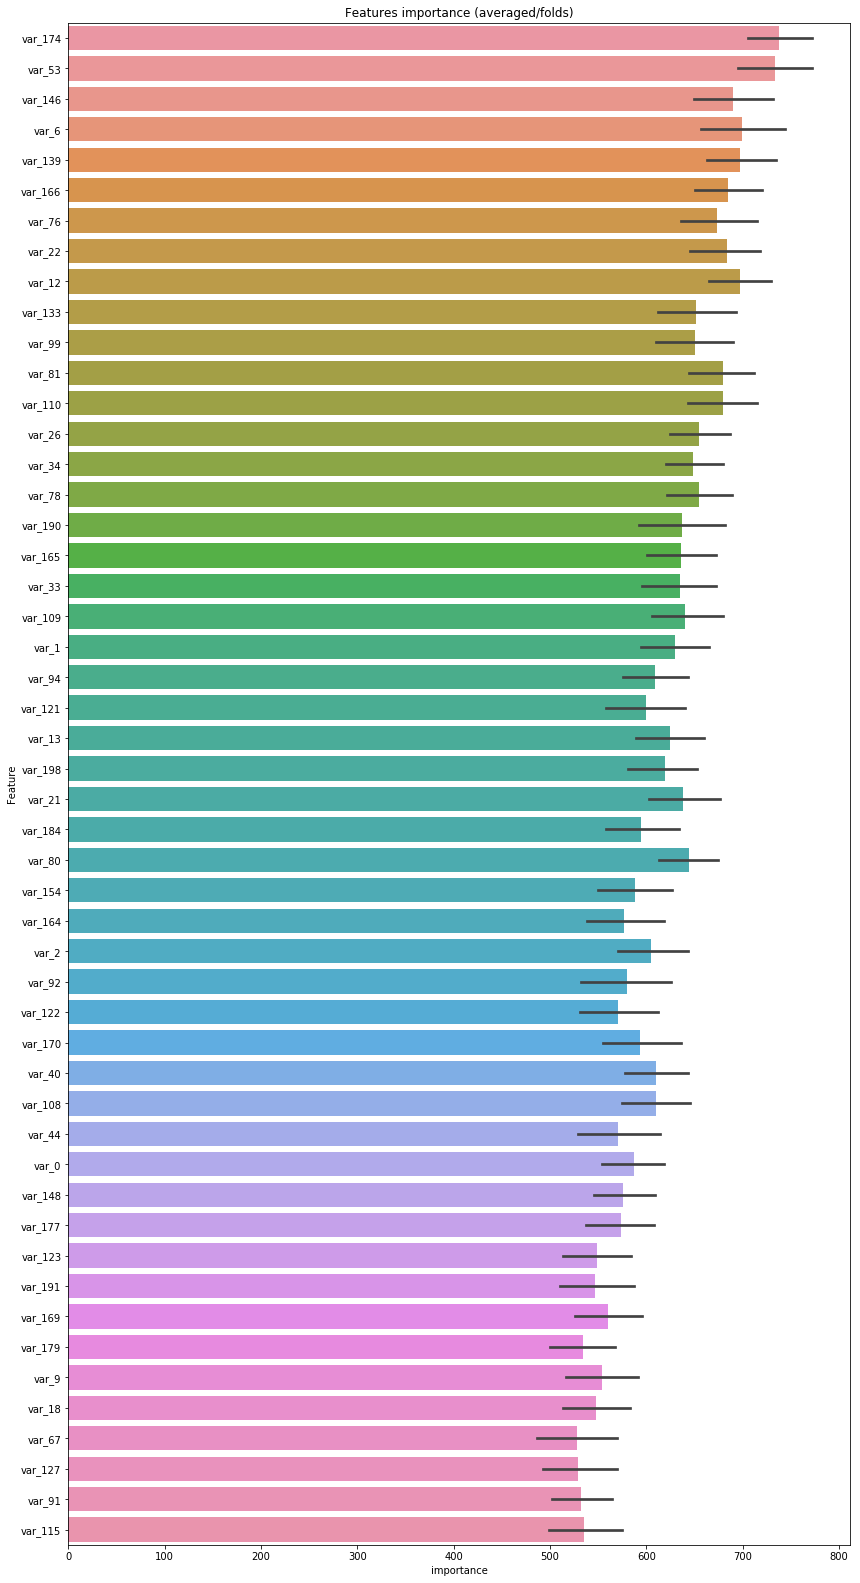

In [134]:
#light GBM have it's inbuilt labraries for feature importance
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:50].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')


In [135]:
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
best_features

,Feature,importance,fold
0,var_0,621,1
1,var_1,684,1
2,var_2,675,1
6,var_6,787,1
9,var_9,597,1
12,var_12,715,1
13,var_13,638,1
18,var_18,566,1
21,var_21,701,1
22,var_22,710,1


In [127]:
#So lightGBM and Naive bayes providing a beter result compared to other model like decision tree and random forest 
#classification through Naive bayes and lightGBM
new_test= test.drop(['ID_code'], axis=1)

In [157]:
standardized_test = preprocessing.scale(new_test)
NB_Predictions = NB_model.predict(standardized_test)


In [158]:
test['target1']=NB_Predictions

In [160]:
lgb_prediction=clf.predict(new_test)

In [161]:
test['target2']=lgb_prediction